In [197]:
fields_2021_df = pd.read_csv('fields_2021.csv')
field_dict = dict(zip(fields_2021['FIELD'],fields_2021['field_rank_year']))
fields = list(fields_2021_df['FIELD'])
fields
gdf = gpd.read_file('fields.geojson')
gdf = gdf.to_crs(epsg = 4326)
gdf = gdf.loc[gdf['geometry']!=None]
gdf = gdf[gdf['FIELD_NAME'].isin(fields)]
gdf['FIELD_DBK'] = gdf['FIELD_DBK'].apply(lambda x: str(x))
gdf['rank'] = gdf['FIELD_NAME'].map(field_dict)
gdf.head()


geo= gpd.GeoSeries(gdf.set_index('FIELD_DBK')['geometry']).to_json()
# Now turn geometyr column into a GeoJson
m = folium.Map(location=[53,6], zoom_start=6)
folium.Choropleth(geo_data=geo, name='Choropleth', data=gdf, columns=['FIELD_DBK', 'rank'], key_on = 'feature.id', fill_color='YlGn', fill_opacity=0.5).add_to(m)
production_dict = dict(zip(fields_2021_df['FIELD'], fields_2021_df['PRODUCTION']))

gdf = gdf.reset_index(drop=True)
gdf['PRODUCTION']= gdf['FIELD_NAME'].map(production_dict)
for i in range(len(gdf)):
    row = gdf.loc[[i]]
    feature = folium.features.GeoJson(
    row,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=[
            'FIELD_NAME', 'PRODUCTION', 'rank'
        ],
        aliases=[
            "Participant: ",
            'Production 2021: ',
            # ADD PRODUCION FOR last month (Dec2021)
            'Ranking out of 282 Fields:'
        ],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
        )
    )
    m.add_child(feature)
    m.keep_in_front(feature)



m

NameError: name 'fields_2021' is not defined

In [198]:

# style_function = lambda x: {'fillColor': '#ffffff', 
#                             'color':'#000000', 
#                             'fillOpacity': 0.1, 
#                             'weight': 0.1}
# highlight_function = lambda x: {'fillColor': '#000000', 
#                                 'color':'#000000', 
#                                 'fillOpacity': 0.50, 
#                                 'weight': 0.1}


# hover = folium.features.GeoJson(gdf, style_function=style_function, control=False, highlight_function=highlight_function, tooltip=folium.features.GeoJsonTooltip(
#         fields=['FIELD_DBK','rank'],
#         aliases=['Field: ','Rank by production in year ']))
# hover = folium.features.GeoJson()
# m.add_child(hover)
# m.keep_in_front(hover)
# folium.LayerControl().add_to(m)
# m
gdf = gdf.reset_index(drop=True)

In [199]:
import folium

m = folium.Map(location=[40.66393072,-73.93827499], zoom_start=13)

m.add_child(folium.GeoJson(data=
    open('fields.geojson')))

m

ValueError: Cannot render objects with any missing geometries: <_io.TextIOWrapper name='fields.geojson' mode='r' encoding='UTF-8'>

In [200]:
gdf = gpd.read_file('fields.geojson')

In [201]:
gdf.iloc[[0]]

,FIELD_DBK,FIELD_NAME,FIELD_CODE,FIRST_FIEL,LEG_STATUS,GEOMETRY_A,GEOMETRY_L,geometry
0,118122628.0,Nes-Noord,NSN,NSN,"Gas,3",0.0,0.0,"POLYGON ((683985.656 5931987.080, 684138.541 5..."


In [202]:
fields_2021_df


,FIELD,PRODUCTION,field_rank_year
0,Groningen,5586818.311,1
1,D12-B,548708.776,2
2,A18-FA,366025.669,3
3,Nes,352902.685,4
4,L05a-D,333983.179,5
...,...,...,...
277,Dalen,0.000,210
278,D18a-A,0.000,210
279,D15a-A104,0.000,210
280,Schermer,0.000,210


In [203]:
gdf['geometry']

0      POLYGON ((683985.656 5931987.080, 684138.541 5...
1      POLYGON ((780937.446 5900289.717, 780863.875 5...
2      POLYGON ((710176.948 5860052.464, 711677.252 5...
3      POLYGON ((572672.464 5764071.503, 572639.261 5...
4      POLYGON ((600100.899 5787518.152, 600036.433 5...
                             ...                        
565                                                 None
566                                                 None
567    POLYGON ((487202.188 6026489.378, 487114.402 6...
568                                                 None
569                                                 None
Name: geometry, Length: 570, dtype: geometry

In [204]:
l = ['All']
a =list(gdf['FIELD_NAME'].unique()).sort()
a

In [205]:
years = [5,4,3,2]
years.sort()
years

[2, 3, 4, 5]

In [206]:
df= pd.read_csv('production_molten.csv')



In [207]:
import pandas as pd
df= pd.read_csv('production_molten.csv')

import matplotlib.pyplot as plt
df_sns = df.loc[df['YEAR']==2020]
sums_m_2021 = df_sns.groupby(['MONTH'])['PRODUCTION'].sum().reset_index(level=0)
sums_y = df.groupby('YEAR')['PRODUCTION'].sum().reset_index(level=0)
sums_m_2021

,MONTH,PRODUCTION
0,APR,1.935852e+06
1,AUG,1.131304e+06
2,DEC,1.967492e+06
3,FEB,1.976538e+06
4,JAN,2.364992e+06
5,JUL,1.215497e+06
6,JUN,1.491034e+06
7,MAR,1.751633e+06
8,MAY,2.291417e+06
9,NOV,1.717847e+06


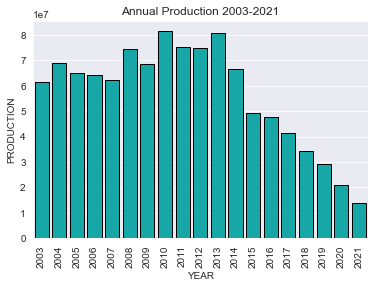

In [208]:
import seaborn as sns
sns.set_style('darkgrid')
g = sns.barplot(x='MONTH',y='PRODUCTION', data=sums_m_2021, edgecolor='black', order = ['JAN','FEB', 'MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
g.set_title('Monthly in 2020')

g_y  =sns.barplot(data=sums_y, x='YEAR', y = 'PRODUCTION',color='c', edgecolor='black')
g_y.set_title('Annual Production 2003-2021')
g_y.tick_params(axis='x',rotation=90)

In [209]:
gdf = gpd.read_file('fields.geojson')
gdf.LEG_STATUS.unique()

array(['Gas,3', 'Gas,1', 'Oil,3', 'Gas,2', 'Gas,4', 'Gas,5', 'Oil,1',
       'Oil,2', 'Oil and Gas,2', 'Oil and Gas,3', 'Oil and Gas,4'],
      dtype=object)

In [210]:
gdf = gdf.loc[(gdf.LEG_STATUS.str.startswith('Gas'))]

In [211]:
df.head()

,FIELD,WELL,OPERATOR,YEAR,MONTH,PRODUCTION,field_rank_year
0,'s-Gravenzande,'S-GRAVENZANDE-02,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,15729.552738,25
1,Ameland-Oost,AMELAND OOST-101,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13
2,Ameland-Oost,AMELAND OOST-102,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,3587.505351,13
3,Ameland-Oost,AMELAND OOST-104,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13
4,Ameland-Oost,AMELAND OOST-105,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,957.440854,13


In [212]:
df

,FIELD,WELL,OPERATOR,YEAR,MONTH,PRODUCTION,field_rank_year
0,'s-Gravenzande,'S-GRAVENZANDE-02,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,15729.552738,25
1,Ameland-Oost,AMELAND OOST-101,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13
2,Ameland-Oost,AMELAND OOST-102,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,3587.505351,13
3,Ameland-Oost,AMELAND OOST-104,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13
4,Ameland-Oost,AMELAND OOST-105,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,957.440854,13
...,...,...,...,...,...,...,...
230815,Q04-B,Q04-B-01,Wintershall Noordzee B.V.,2007,DEC,14791.947451,60
230816,Q05-A,Q05-A-01,Wintershall Noordzee B.V.,2007,DEC,425.687740,250
230817,Q08-A,Q08-A-02,Wintershall Noordzee B.V.,2007,DEC,0.000000,301
230818,Q08-B,Q08-B-01,Wintershall Noordzee B.V.,2007,DEC,0.000000,323


In [213]:
df.head()
df.loc[df['FIELD']=='Groningen']['PRODUCTION'].sum()

638794181.8772409

In [214]:
        sums_y = df.groupby(['YEAR','FIELD'])['PRODUCTION'].sum().reset_index(level=0)
        sums_y=sums_y.loc[sums_y['PRODUCTION']>0]
        colormap = cm.linear.YlGnBu_09.to_step(10)
colormap

In [215]:
import branca.colormap as cm


In [216]:
df= pd.read_csv('production_molten.csv')


In [217]:
df_2021 = df.loc[df['YEAR']==2021]
df_2021.groupby(['FIELD'])['PRODUCTION'].sum()
df_2021

,FIELD,WELL,OPERATOR,YEAR,MONTH,PRODUCTION,field_rank_year
14242,'s-Gravenzande,'S-GRAVENZANDE-02,Nederlandse Aardolie Maatschappij B.V.,2021,JAN,2954.514,25
14243,Ameland-Oost,AMELAND OOST-101,Nederlandse Aardolie Maatschappij B.V.,2021,JAN,0.000,13
14244,Ameland-Oost,AMELAND OOST-102,Nederlandse Aardolie Maatschappij B.V.,2021,JAN,53.320,13
14245,Ameland-Oost,AMELAND OOST-104,Nederlandse Aardolie Maatschappij B.V.,2021,JAN,0.000,13
14246,Ameland-Oost,AMELAND OOST-105,Nederlandse Aardolie Maatschappij B.V.,2021,JAN,208.812,13
...,...,...,...,...,...,...,...
226818,Q13a-Amstel,Q13-A-03,Neptune Energy Netherlands B.V.,2021,DEC,0.000,268
226819,Q13a-Amstel,Q13-A-04,Neptune Energy Netherlands B.V.,2021,DEC,0.000,268
226820,Q13a-Amstel,Q13-A-05,Neptune Energy Netherlands B.V.,2021,DEC,0.000,268
226821,Q16-FA,Q16-FA-101,ONE-Dyas B.V.,2021,DEC,0.000,38


In [218]:
years_sum = df.groupby(['YEAR', 'FIELD']).agg({'PRODUCTION':'sum'})
years_sum
years_sum['pct_share'] = years_sum.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
years_sum

PRODUCTION  pct_share
YEAR FIELD                                    
2003 's-Gravenzande    9.687084e+05   1.577919
     Ameland-Noord     0.000000e+00   0.000000
     Ameland-Oost      5.767442e+05   0.939452
     Ameland-Westgat   2.755786e+05   0.448887
     Anjum             1.193221e+06   1.943624
...                             ...        ...
2021 Witterdiep        0.000000e+00   0.000000
     Zevenhuizen       0.000000e+00   0.000000
     Zuid-Schermer     0.000000e+00   0.000000
     Zuidwal           0.000000e+00   0.000000
     Zuidwending-Oost  2.641024e+03   0.019106

[4915 rows x 2 columns]

In [219]:
colormap = cm.LinearColormap(colors=['lightyellow','lightgreen','green','darkgreen'],index=[0,1,5,70],vmin=0,vmax=20)
colormap

In [220]:
max(years_sum['pct_share'])

70.60361631292596

In [221]:
years_sum = years_sum.reset_index()
years_sum.loc[years_sum['FIELD']=='Groningen']


,YEAR,FIELD,PRODUCTION,pct_share
41,2003,Groningen,3.063494e+07,49.900924
248,2004,Groningen,3.463824e+07,50.240806
455,2005,Groningen,3.563784e+07,54.882468
672,2006,Groningen,3.502846e+07,54.434974
904,2007,Groningen,3.049160e+07,48.836272
1144,2008,Groningen,4.346590e+07,58.520929
1389,2009,Groningen,3.973921e+07,57.977932
1646,2010,Groningen,5.365201e+07,65.880381
1902,2011,Groningen,4.934858e+07,65.764208
2168,2012,Groningen,5.039701e+07,67.271682


In [222]:
TEST = df.loc[df['YEAR']==2021].groupby(['YEAR', 'FIELD']).agg({'PRODUCTION':'sum'})
TEST

PRODUCTION
YEAR FIELD                       
2021 's-Gravenzande     14506.379
     A12-FA            228959.129
     A18-FA            366025.669
     Ameland-Oost      115071.186
     Ameland-Westgat    74651.089
...                           ...
     Witterdiep             0.000
     Zevenhuizen            0.000
     Zuid-Schermer          0.000
     Zuidwal                0.000
     Zuidwending-Oost    2641.024

[282 rows x 1 columns]

In [223]:
        pct_dict = dict(zip(years_sum['FIELD'], years_sum['pct_share']))
pct_dict

{"'s-Gravenzande": 0.10494491868544757,
 'Ameland-Noord': 0.0,
 'Ameland-Oost': 0.8324707535773066,
 'Ameland-Westgat': 0.5400556861836513,
 'Anjum': 0.5017076979783218,
 'Annerveen': 0.2821761733160949,
 'Appelscha': 0.0,
 'Barendrecht': 0.0,
 'Barendrecht-Ziedewij': 0.0,
 'Bedum': 0.8178179796770806,
 'Bergen': 0.09118447160194533,
 'Bergermeer': 0.03644906718859793,
 'Berkel': 0.006960705301089248,
 'Blija-Ferwerderadeel': 0.10468421268606155,
 'Blija-Zuidoost': 0.2566984033529531,
 'Blijham': 0.07190804204132606,
 'Boerakker': 0.07797132119312611,
 'Botlek': 0.34296108252005947,
 'Bozum': 0.0,
 'Castricum-Zee': 0.0,
 'Coevorden': 0.7849067283535832,
 'Collendoornerveen': 3.063075266415631e-09,
 'D15a-A': 0.0,
 'Dalen': 0.0,
 'De Blesse': 0.1970219992456371,
 'De Lutte': 0.0,
 'De Wijk': 0.3683265673924202,
 'Den Velde': 0.08790276782606259,
 'Eleveld': 0.3043964240957435,
 'Emmen': 0.0022306049228102568,
 'Emmen-Nieuw Amsterdam': 0.0,
 'Engwierum': 0.0,
 'Ezumazijl': 0.008045735694

In [224]:
   import geopandas as gpd
fields = df['FIELD'].unique()
rank_dict = dict(zip(df['FIELD'],df['field_rank_year']))
gdf = gpd.read_file('fields.geojson')
gdf = gdf.to_crs(epsg = 4326)
gdf = gdf.loc[gdf['geometry']!=None]
# Filter non gas fields

gdf = gdf.loc[(gdf.LEG_STATUS.str.startswith('Gas'))]
# Filter Fields without production data
gdf = gdf[gdf['FIELD_NAME'].isin(fields)]
# Stringify Field codes
gdf['FIELD_DBK'] = gdf['FIELD_DBK'].apply(lambda x: str(x))
# Map rank based on dictionary 
gdf['PRODUCTION'] = gdf['FIELD_NAME'].map(field_dict)
gdf['rank'] = gdf['FIELD_NAME'].map(rank_dict)

NameError: name 'field_dict' is not defined

In [ ]:
        years_sum = df.loc[df['YEAR']==2021].groupby(['YEAR', 'FIELD']).agg({'PRODUCTION':'sum'})
        years_sum['pct_share'] = years_sum.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
        years_sum = years_sum.reset_index()
        pct_dict = dict(zip(years_sum['FIELD'], years_sum['pct_share']))

        gdf = gdf.reset_index(drop=True)
        gdf['pct_dict']= gdf['FIELD_NAME'].map(pct_dict)
        geo= gpd.GeoSeries(gdf.set_index('FIELD_DBK')['geometry']).to_json()

In [ ]:
gdf['pct_dict'].

In [ ]:
geo

In [ ]:
    gdf = gpd.read_file('fields.geojson')
    gdf = gdf.to_crs(epsg = 4326)
    gdf = gdf.loc[gdf['geometry']!=None]
    # Filter non gas fields
    gdf = gdf.loc[(gdf.LEG_STATUS.str.startswith('Gas'))]
    # Filter Fields without production data
    gdf = gdf[gdf['FIELD_NAME'].isin(fields)]
    # Stringify Field codes
    gdf['FIELD_DBK'] = gdf['FIELD_DBK'].apply(lambda x: str(x))
    # Map rank based on dictionary 
    # gdf['PRODUCTION'] = gdf['FIELD_NAME'].map(field_dict)
    gdf['rank'] = gdf['FIELD_NAME'].map(rank_dict)

    years_sum = df.loc[df['YEAR']==2021].groupby(['YEAR', 'FIELD']).agg({'PRODUCTION':'sum'})
    years_sum['pct_share'] = years_sum.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
    years_sum = years_sum.reset_index()
    pct_dict = dict(zip(years_sum['FIELD'], years_sum['pct_share']))

    gdf = gdf.reset_index(drop=True)
    gdf['pct_dict']= gdf['FIELD_NAME'].map(pct_dict)
    gdf = gdf.fillna(0)
    gdf

In [ ]:
gdf.shape

In [ ]:
len(df.FIELD.unique())

In [ ]:
geo

In [ ]:
wellc_df=df.groupby('FIELD')['WELL'].nunique().reset_index()
wellc_dict = zip(wellc_df['FIELD'], wellc_df['WELL'])

In [ ]:
wellc_dict = zip(wellc_df['FIELD'], wellc_df['WELL'])

In [ ]:
years_sum = df.loc[df['YEAR']==2021].groupby(['YEAR', 'FIELD']).agg({'PRODUCTION':'sum'})
years_sum['pct_share'] = years_sum.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
years_sum = years_sum.reset_index()
pct_dict = dict(zip(years_sum['FIELD'], years_sum['pct_share']))

gdf = gdf.reset_index(drop=True)
gdf['pct_share']= gdf['FIELD_NAME'].map(pct_dict)
gdf['pct_share'] = gdf['pct_share'].round(1)
gdf

In [ ]:
    custom_scale = (gdf['pct_share'].quantile((0,0.8,0.95,.98,.9963,.9999, 1))).tolist()


In [ ]:
custom_scale

In [ ]:
import seaborn as sns
df_sns = df.loc[df['YEAR']==2020]
sums_m_2021 = df_sns.groupby(['MONTH'])['PRODUCTION'].sum().reset_index(level=0)
sums_y = df.groupby('YEAR')['PRODUCTION'].sum().reset_index(level=0)

sns.set_style('darkgrid')
g = sns.barplot(x='MONTH',y='PRODUCTION', data=sums_m_2021, edgecolor='black', color='c',order = ['JAN','FEB', 'MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
g.set_title('2020 Production')

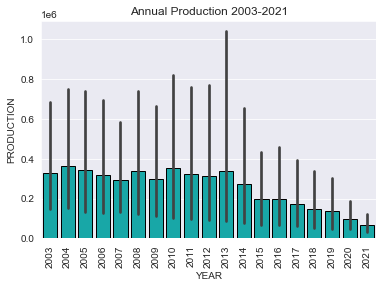

In [225]:
    g_y  =sns.barplot(data=sums_y, x='YEAR', y = 'PRODUCTION',color='c', edgecolor='black')
    g_y.set_title('Annual Production 2003-2021')
    g_y.tick_params(axis='x',rotation=90)

In [226]:
custom_pal = sns.blend_palette(['darkblue', 'lightgreen','yellow','#fc4e2a','brown', 'lightblue'], 12)
custom_pal

[(0.0, 0.0, 0.5450980392156862),
 (0.2546712802768166, 0.42091503267973857, 0.5539407920030757),
 (0.5093425605536333, 0.8418300653594771, 0.5627835447904652),
 (0.7183391003460208, 0.9568627450980393, 0.3653979238754325),
 (0.9231833910034601, 0.9882352941176471, 0.09965397923875435),
 (0.9967704728950404, 0.8094579008073819, 0.04521337946943481),
 (0.9914648212226067, 0.49642445213379494, 0.11949250288350628),
 (0.9280276816608999, 0.280968858131488, 0.16470588235294117),
 (0.7674740484429067, 0.21453287197231838, 0.16470588235294117),
 (0.6501345636293734, 0.23160322952710496, 0.2369857747020377),
 (0.6642829680891965, 0.5393310265282584, 0.5694732795078816),
 (0.6784313725490196, 0.8470588235294118, 0.9019607843137255)]

In [227]:
df.head()

,FIELD,WELL,OPERATOR,YEAR,MONTH,PRODUCTION,field_rank_year
0,'s-Gravenzande,'S-GRAVENZANDE-02,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,15729.552738,25
1,Ameland-Oost,AMELAND OOST-101,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13
2,Ameland-Oost,AMELAND OOST-102,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,3587.505351,13
3,Ameland-Oost,AMELAND OOST-104,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13
4,Ameland-Oost,AMELAND OOST-105,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,957.440854,13


In [228]:
    sums_m = df.groupby(['YEAR', 'MONTH'])['PRODUCTION'].sum().reset_index(level=1)
sums_m


,MONTH,PRODUCTION
YEAR,,
2003,APR,3.893172e+06
2003,AUG,2.302623e+06
2003,DEC,8.409872e+06
2003,FEB,9.045275e+06
2003,JAN,9.700486e+06
...,...,...
2021,MAR,1.817961e+06
2021,MAY,1.717012e+06
2021,NOV,0.000000e+00


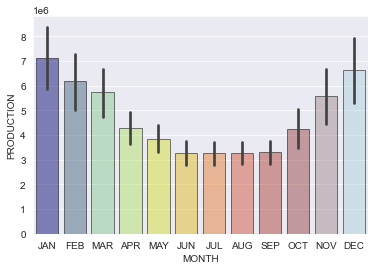

In [229]:
    ax2 = sns.barplot(x='MONTH',y='PRODUCTION',data=sums_m,palette = custom_pal, ci = 95,edgecolor='black', order = ['JAN','FEB', 'MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], alpha=0.5)


In [230]:
ax2.set_xlabel('poop')

Text(0.5, 16.200000000000003, 'poop')

In [231]:
gdf= gdf.drop('pct_dict', axis=1)
gdf = gdf.fillna(0)

KeyError: "['pct_dict'] not found in axis"

In [ ]:
gdf

In [ ]:
gdf_groningen = gdf.loc[gdf['FIELD_NAME']== 'Groningen']         


In [ ]:
    for i in range(len(gdf_groningen)):
        row = gdf_groningen.loc[[i]]

In [ ]:
row

In [232]:
df.head()

,FIELD,WELL,OPERATOR,YEAR,MONTH,PRODUCTION,field_rank_year
0,'s-Gravenzande,'S-GRAVENZANDE-02,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,15729.552738,25
1,Ameland-Oost,AMELAND OOST-101,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13
2,Ameland-Oost,AMELAND OOST-102,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,3587.505351,13
3,Ameland-Oost,AMELAND OOST-104,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13
4,Ameland-Oost,AMELAND OOST-105,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,957.440854,13


In [238]:
well_nums = df.groupby('FIELD')['WELL'].nunique().reset_index()
well_nums_dict = dict(zip(well_nums['FIELD'], well_nums['WELL']))

,FIELD,WELL
0,'s-Gravenzande,1
1,A12-FA,10
2,A18-FA,5
3,Ameland-Noord,1
4,Ameland-Oost,15
...,...,...
329,Witterdiep,1
330,Zevenhuizen,1
331,Zuid-Schermer,1
332,Zuidwal,10


In [234]:
df.head()

,FIELD,WELL,OPERATOR,YEAR,MONTH,PRODUCTION,field_rank_year,well_count
0,'s-Gravenzande,'S-GRAVENZANDE-02,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,15729.552738,25,NaN
1,Ameland-Oost,AMELAND OOST-101,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13,NaN
2,Ameland-Oost,AMELAND OOST-102,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,3587.505351,13,NaN
3,Ameland-Oost,AMELAND OOST-104,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,0.000000,13,NaN
4,Ameland-Oost,AMELAND OOST-105,Nederlandse Aardolie Maatschappij B.V.,2012,JAN,957.440854,13,NaN


In [244]:
gas  =pd.read_csv('gas_import_export.csv', delimiter=';')

In [246]:
gas.head()
gas['Periods'] = gas['Periods'].astype('int')

ValueError: invalid literal for int() with base 10: '2020 August**'

In [251]:
     df_imports = pd.read_csv('gas_import_export.csv', delimiter='/')

In [252]:
df_imports.head()

,Periods\tSupply of natural gas,Total supply (mln m3)\tSupply of natural gas,Indigenous production (mln m3)\tSupply of natural gas,Production from other sources (mln m3)\tSupply of natural gas,Imports of gaseous natural gas (mln m3)\tSupply of natural gas,Imports of liquefied natural gas (Lng) (mln m3)\tSupply of natural gas,Exports of gaseous natural gas (mln m3)\tSupply of natural gas,Exports of liquefied natural gas (Lng) (mln m3)\tSupply of natural gas,Bunkers ()\tSupply of natural gas,Stock change (mln m3)\tConsumption of natural gas,Total consumption (mln m3)\tConsumption of natural gas,Via the main grid,Total via the main grid (mln m3)\tConsumption of natural gas,Via the main grid.1,Electricity power plants (mln m3)\tConsumption of natural gas,Via the main grid.2,Other consumers (mln m3)\tConsumption of natural gas,Via regional grids (mln m3)\tConsumption of natural gas,Consumption by production and transport (mln m3)\tClosing stock (mln m3)\tFlaring (mln m3)
0,2003\t47608\t69062\t12\t24147\t\t45581\t\t\t-3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004\t48616\t81459\t12\t17860\t\t50742\t\t\t27...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005\t46744\t74312\t12\t21747\t\t49445\t\t\t11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006\t45327\t73370\t24\t23866\t\t51813\t\t\t-1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007\t44134\t70526\t36\t24735\t\t52769\t\t\t16...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
cbs = pd.read_csv('cbs_nat_gas.csv',delimiter=';')

In [276]:
cbs.head()

,YEARS,TOTAL_SUPPLY (mln m3),PRODUCTION_INDIGENOUS (mln m3),PRODUCTION_OTHERS (mln m3),IMPORT_NAT_GAS (mln m3),IMPORT_LNG (mln m3),EXPORT_NAT_GAS (mln m3),EXPORT_LNG (mln m3),STOCK_CHANGE (mln m3),TOTAL_CONSUMPTION (mln m3),STOCK_CLOSING (mln m3),FLARING (mln m3)
0,1946,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1948,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1949,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
cbs.dtypes



YEARS                               int64
TOTAL_SUPPLY (mln m3)               int64
PRODUCTION_INDIGENOUS (mln m3)      int64
PRODUCTION_OTHERS (mln m3)        float64
IMPORT_NAT_GAS (mln m3)           float64
IMPORT_LNG (mln m3)               float64
EXPORT_NAT_GAS (mln m3)           float64
EXPORT_LNG (mln m3)               float64
STOCK_CHANGE (mln m3)             float64
TOTAL_CONSUMPTION (mln m3)        float64
STOCK_CLOSING (mln m3)            float64
FLARING (mln m3)                  float64
dtype: object

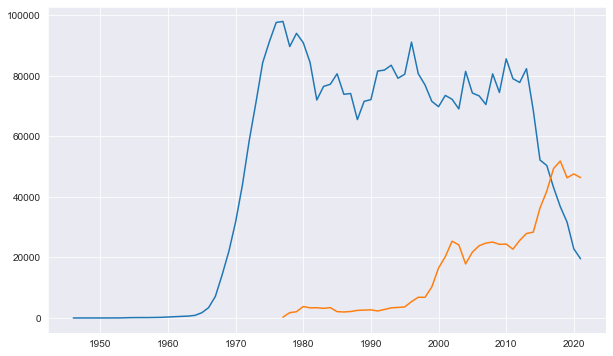

In [289]:

fig,ax =  plt.subplots(figsize=(10,6))
ax.plot(cbs['YEARS'], cbs['PRODUCTION_INDIGENOUS (mln m3)'])
ax.plot(cbs['YEARS'], cbs['IMPORT_NAT_GAS (mln m3)'])
ax.plot


ax.plot()
plt.show()

In [344]:
cbs['delta_PROD_IND'] = cbs['PRODUCTION_INDIGENOUS (mln m3)'].diff().fillna(0).astype(int)
cbs['delta_STCK_CHG'] = cbs['STOCK_CLOSING (mln m3)'].diff().fillna(0).astype(int)
cbs['delta_EXPORT_NAT_GAS'] = cbs['EXPORT_NAT_GAS (mln m3)'].diff().fillna(0).astype(int)
cbs['delta_IMPORT_NAT_GAS'] = cbs['IMPORT_NAT_GAS (mln m3)'].diff().fillna(0).astype(int)
cbs['delta_IMPORT_LNG'] = cbs['IMPORT_LNG (mln m3)'].diff().fillna(0).astype(int)
cbs['delta_EXPORT_LNG'] = cbs['IMPORT_LNG (mln m3)'].diff().fillna(0).astype(int)
cbs['delta_TOTAL_SUPPLY'] = cbs['TOTAL_SUPPLY (mln m3)'].diff().fillna(0).astype(int)
cbs['delta_TOTAL_CONSUMPTION'] = cbs['TOTAL_CONSUMPTION (mln m3)'].diff().fillna(0).astype(int)
cbs.to_csv('cbs_nat_gas.csv', index=False)

In [357]:
cbs = pd.read_csv('cbs_nat_gas.csv')
cbs.tail(20)

,YEARS,TOTAL_SUPPLY (mln m3),PRODUCTION_INDIGENOUS (mln m3),PRODUCTION_OTHERS (mln m3),IMPORT_NAT_GAS (mln m3),IMPORT_LNG (mln m3),EXPORT_NAT_GAS (mln m3),EXPORT_LNG (mln m3),STOCK_CHANGE (mln m3),TOTAL_CONSUMPTION (mln m3),STOCK_CLOSING (mln m3),FLARING (mln m3),delta_PROD_IND,delta_STCK_CHG,delta_EXPORT_NAT_GAS,delta_IMPORT_NAT_GAS,delta_IMPORT_LNG,delta_EXPORT_LNG,delta_TOTAL_SUPPLY,delta_TOTAL_CONSUMPTION
56,2002,47357,72251,12.0,25363.0,NaN,49766.0,NaN,-503.0,47357.0,NaN,60.0,-1280,0,2816,5096,0,0,-105,-105
57,2003,47608,69062,12.0,24147.0,NaN,45581.0,NaN,-32.0,47608.0,NaN,52.0,-3189,0,-4185,-1216,0,0,251,251
58,2004,48616,81459,12.0,17860.0,NaN,50742.0,NaN,27.0,48616.0,NaN,40.0,12397,0,5161,-6287,0,0,1008,1008
59,2005,46744,74312,12.0,21747.0,NaN,49445.0,NaN,118.0,46744.0,NaN,38.0,-7147,0,-1297,3887,0,0,-1872,-1872
60,2006,45327,73370,24.0,23866.0,NaN,51813.0,NaN,-120.0,45327.0,NaN,29.0,-942,0,2368,2119,0,0,-1417,-1417
61,2007,44134,70526,36.0,24735.0,NaN,52769.0,NaN,1606.0,44134.0,NaN,71.0,-2844,0,956,869,0,0,-1193,-1193
62,2008,45881,80654,48.0,25081.0,NaN,58504.0,NaN,-1398.0,45881.0,NaN,103.0,10128,0,5735,346,0,0,1747,1747
63,2009,46963,74501,48.0,24323.0,NaN,52717.0,NaN,808.0,46963.0,NaN,46.0,-6153,0,-5787,-758,0,0,1082,1082
64,2010,53046,85606,48.0,24408.0,NaN,56433.0,NaN,-583.0,53046.0,NaN,42.0,11105,0,3716,85,0,0,6083,6083
65,2011,46412,79046,57.0,22732.0,0.0,54321.0,0.0,-1102.0,46412.0,NaN,49.0,-6560,0,-2112,-1676,0,0,-6634,-6634


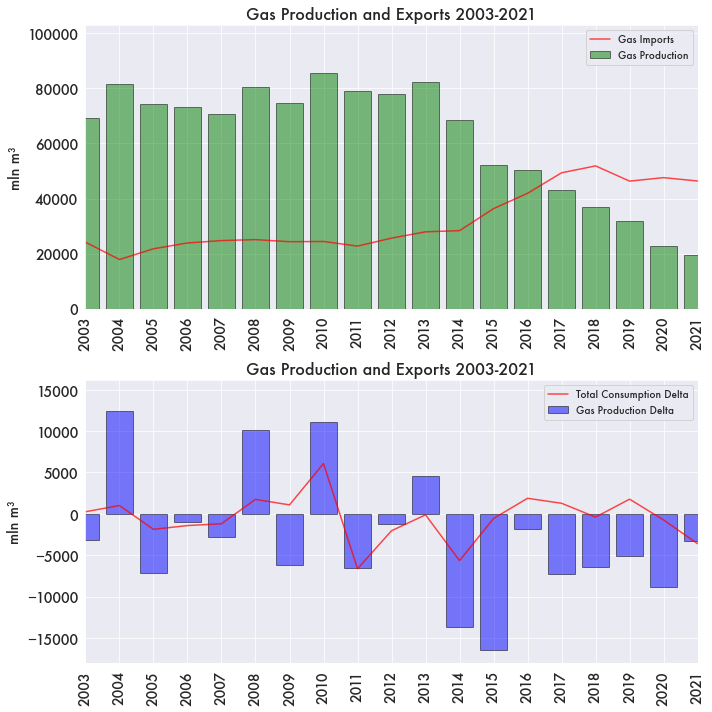

In [365]:
import numpy as np
plt.rcParams["font.family"] = "futura"

fig, (ax1,ax2)= plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax1.bar(cbs['YEARS'], cbs['PRODUCTION_INDIGENOUS (mln m3)'], alpha = 0.5, label = 'Gas Production',color='g',edgecolor='black')
ax1.plot(cbs['YEARS'], cbs['IMPORT_NAT_GAS (mln m3)'],label='Gas Imports', color='r', alpha=.7)
ax1.set_ylabel('mln m\u00b3', fontsize=14)
ax1.set_xlim([2003,2021])

ax1.set_xticks(np.arange(2003, 2022, 1))
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_title('Gas Production and Exports 2003-2021', fontsize=16)
ax1.legend(loc='upper right')
ax1.tick_params(axis='x', rotation=90)

ax2.bar(cbs['YEARS'], cbs['delta_PROD_IND'], alpha = 0.5, label = 'Gas Production Delta',color='b',edgecolor='black')
ax2.plot(cbs['YEARS'], cbs['delta_TOTAL_CONSUMPTION'],label='Total Consumption Delta', color='r', alpha=.7)
ax2.set_ylabel('mln m\u00b3', fontsize=14)
ax2.set_xlim([2003,2021])

ax2.set_xticks(np.arange(2003, 2022, 1))
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_title('Gas Production and Exports 2003-2021', fontsize=16)
ax2.legend(loc='upper right')
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

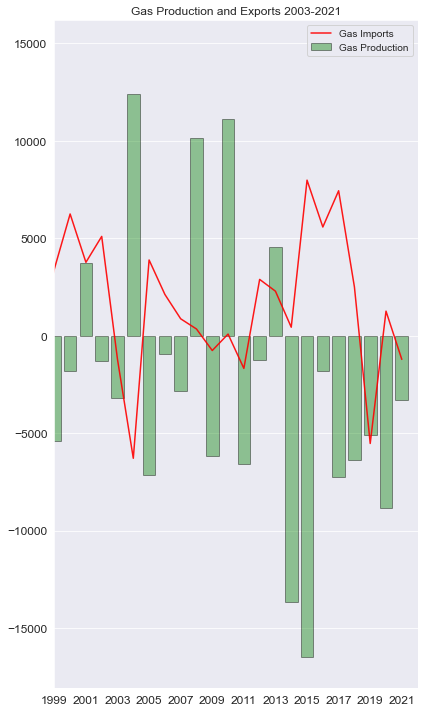

In [352]:
import numpy as np
fig, ax= plt.subplots(figsize=(6,10))
ax.bar(cbs['YEARS'], cbs['delta_PROD_IND'], alpha = 0.4, color='g',label = 'Gas Production',edgecolor='black')
ax.plot(cbs['YEARS'], cbs['delta_IMPORT_NAT_GAS'],label='Gas Imports', color='r', alpha=.9)
ax.set_xlim([1999,2022])
ax.set_xticks(np.arange(1999, 2022, 2))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('Gas Production and Exports 2003-2021')
ax.grid(axis='x')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [383]:
    df = df.sort_values('YEAR')
    df['delta_WELL_PROD'] = df.groupby(['WELL','YEAR'])['PRODUCTION'].diff().fillna(0).astype(int)


In [385]:
df = df.drop('delta_PROD', axis=1)

In [387]:
df=  df.reset_index(drop=True)

In [399]:
df.head()
fields = df.groupby(['YEAR', 'FIELD'])['PRODUCTION'].sum().reset_index()

In [403]:
fields['delta_prod']=fields.groupby('FIELD')['PRODUCTION'].diff().fillna(0).astype(int)

In [414]:
fields=pd.read_csv('fields.csv')
fields= fields.drop('Unnamed: 0', axis=1)
fields.to_csv('fields.csv',index=False)

In [415]:
fields=pd.read_csv('fields.csv')
fields.head()

,YEAR,FIELD,PRODUCTION,delta_prod
0,2003,'s-Gravenzande,9.687084e+05,0
1,2003,Ameland-Noord,0.000000e+00,0
2,2003,Ameland-Oost,5.767442e+05,0
3,2003,Ameland-Westgat,2.755786e+05,0
4,2003,Anjum,1.193221e+06,0


In [424]:
ops=df.drop_duplicates(subset='FIELD')
ops_dict = dict(zip(ops['FIELD'], ops['OPERATOR']))
ops_to_csv('ops.csv', index=False)

In [432]:
ops.to_csv('ops.csv', index=False)

In [428]:
ops_dict = dict(zip(ops['FIELD'], ops['OPERATOR']))


In [430]:
ops.OPERATOR.unique()

array(['Nederlandse Aardolie Maatschappij B.V.',
       'Neptune Energy Netherlands B.V.', 'Spirit Energy Nederland B.V.',
       'Wintershall Noordzee B.V.', 'GDF Production Nederland B.V.',
       'ONE-Dyas B.V.', 'Total E&P Nederland B.V.',
       'Petrogas E&P Netherlands B.V.',
       'Vermilion Energy Netherlands B.V.', 'TAQA Onshore B.V.',
       'Dana Petroleum Netherlands B.V.', 'Taqa Piek Gas B.V.',
       'TAQA Offshore B.V.', 'Kistos NL1 B.V.', 'Kistos NL2 B.V.'],
      dtype=object)

In [433]:
df.head()

,FIELD,WELL,OPERATOR,YEAR,MONTH,PRODUCTION,field_rank_year,well_count,delta_WELL_PROD,sum_field_prod
0,Warffum,WARFFUM-02,Nederlandse Aardolie Maatschappij B.V.,2003,FEB,37.976940,18,NaN,0,0
1,L13-FC,L13-FC-104,Nederlandse Aardolie Maatschappij B.V.,2003,SEP,0.000000,95,NaN,0,0
2,L13-FD,L13-FD-102,Nederlandse Aardolie Maatschappij B.V.,2003,SEP,5008.736420,227,NaN,0,0
3,L13-FE,L13-FE-102,Nederlandse Aardolie Maatschappij B.V.,2003,SEP,7597.497830,119,NaN,0,0
4,L13-FE,L13-FE-103,Nederlandse Aardolie Maatschappij B.V.,2003,SEP,3570.887275,119,NaN,0,-4026


In [435]:
    sums_m = df.groupby(['YEAR', 'MONTH'])['PRODUCTION'].sum().reset_index(level=1)
sums_m.to_csv('monthly_production.csv', index=False)
sums_y = df.groupby('YEAR')['PRODUCTION'].sum().reset_index(level=0)
sums_y.to_csv('annual_production.csv', index=False)


In [444]:
sums_wells_y = df.groupby(['WELL', 'YEAR'])['PRODUCTION'].sum().reset_index()
sums_wells_y['YOY_DELTA'] = sums_fields_y.groupby('FIELD')['PRODUCTION'].diff()
sums_wells_y.to_csv('sums_wells_y.csv', index=False)

In [445]:
sums_wells_y

,WELL,YEAR,PRODUCTION,YOY_DELTA
0,'S-GRAVENZANDE-02,2003,968708.401115,NaN
1,'S-GRAVENZANDE-02,2004,940385.565319,-28322.835796
2,'S-GRAVENZANDE-02,2005,416512.661214,-523872.904105
3,'S-GRAVENZANDE-02,2006,314490.009726,-102022.651488
4,'S-GRAVENZANDE-02,2007,490394.682879,175904.673154
...,...,...,...,...
19230,ZUIDWAL-A-10,2008,0.000000,NaN
19231,ZUIDWAL-A-10,2009,0.000000,NaN
19232,ZUIDWAL-A-10,2010,569.429403,NaN
19233,ZUIDWAL-A-10,2011,0.000000,NaN


In [446]:
df['FIELD'].unique()

array(['Warffum', 'L13-FC', 'L13-FD', 'L13-FE', 'L13-FF', 'L13-FG',
       'L13-FH', 'L15b-A', 'Markham', 'P06-Main', 'P12-SW', 'L13-FB',
       'L10-CDA', 'L10-M', 'L10-S2', 'L10-S3', 'L10-S4', 'L11b-A',
       'L12b-C', 'L10-G', 'P14-A', 'Q01-B', 'Q04-A', 'Q04-B', 'Q08-A',
       'Q08-B', 'Q16-FA', 'L09-FI', 'K12-G', 'K12-S1', 'K14-FA', 'K14-FB',
       'K15-FA', 'K15-FB', 'K15-FC', 'K09ab-A', 'K09ab-B', 'K09c-A',
       'K10-B (gas)', 'K12-A', 'K12-B', 'K12-D', 'K15-FG', 'L07-B',
       'L07-C', 'L07-G', 'L07-H', 'L07-H South-East', 'L07-N', 'L08-A',
       'L08-G', 'L08-H', 'L08-P', 'L09-FC', 'L09-FD', 'L09-FF', 'L07-A',
       'L05a-A', 'K15-FK', 'K15-FL', 'Kotter', 'L01-A', 'L02-FA', 'L04-A',
       'L04-B', 'L04-F', 'L04-I', 'K08-FA', 'K07-FE', 'K07-FD', 'K07-FC',
       'K07-FB', 'K07-FA', 'K06-T', 'K06-N', 'K06-G', 'K06-DN', 'K06-D',
       'K06-C', 'K06-A', 'K05a-Es', 'K08-FC', 'K05a-En', 'K05a-D',
       'Hoorn', 'Helm', 'Helder', 'K05a-B', 'K05a-A', 'K04a-B', 'K04-N',
     

In [447]:
fls = df['FIELD'].isin(fields)

In [448]:
fls

0         False
1         False
2         False
3         False
4         False
          ...  
230815    False
230816    False
230817    False
230818    False
230819    False
Name: FIELD, Length: 230820, dtype: bool

In [449]:
gdf

,FIELD_DBK,FIELD_NAME,FIELD_CODE,FIRST_FIEL,LEG_STATUS,GEOMETRY_A,GEOMETRY_L,geometry
2,118122644.0,Nijensleek,NSL,NSL,"Gas,1",0.0,0.0,"POLYGON ((6.11985 52.84727, 6.14228 52.84926, ..."
3,118122648.0,Noorderdam,NDRD,NDRD,"Gas,1",0.0,0.0,"POLYGON ((4.05773 52.02063, 4.05727 52.02158, ..."
5,118122654.0,Noordwolde,NWD,NWD,"Gas,2",0.0,0.0,"POLYGON ((6.17302 52.90077, 6.17332 52.90064, ..."
7,118122666.0,Norg-Zuid,NRZ,NRZ,"Gas,1",0.0,0.0,"POLYGON ((6.42117 53.04864, 6.42192 53.04857, ..."
8,118122672.0,Oldelamer,OLR,OLR,"Gas,1",0.0,0.0,"POLYGON ((5.80640 52.89619, 5.80650 52.89626, ..."
...,...,...,...,...,...,...,...,...
540,2031141539.0,D12-B,D12-B,D12-B,"Gas,2",0.0,0.0,"POLYGON ((2.75854 54.43511, 2.75884 54.43565, ..."
548,2344560431.0,Grouw-Rauwerd,GRW-RWD,GRW-RWD,"Gas,5",0.0,0.0,"MULTIPOLYGON (((5.78929 53.10211, 5.78967 53.1..."
559,2867891455.0,Q10-A,Q10-A,Q10-A,"Gas,2",0.0,0.0,"POLYGON ((4.27715 52.45875, 4.27455 52.45894, ..."
562,3072405868.0,Spijkenisse-Intra,SPKI,SPKI,"Gas,2",0.0,0.0,"POLYGON ((4.35211 51.83450, 4.35333 51.83389, ..."


In [481]:
thousands = thousands.astype('str')
print(thousands[:-5])
dictionary_fields_production = dict(zip(df['FIELD'].unique(), df.groupby('FIELD')['PRODUCTION'].sum().round(-3)))


638794


In [482]:
dictionary_fields_production['Groningen']

1350000.0

In [483]:
dictionary_fields_production['Nijensleek']

1265000.0

In [506]:
grouped_field_production_df = df.groupby('FIELD')['PRODUCTION'].sum().round(-3).reset_index()
dictionary_fields_production_since_2003 = dict(zip(grouped_field_production_df['FIELD'],grouped_field_production_df['PRODUCTION']))
df['PRODUCTION_SINCE_2003'] = df['FIELD'].map(dictionary_fields_production_since_2003)
df.head()
df = df.sort_values(['YEAR', 'WELL'])
df.to_csv('production_molten.csv', index=False)

In [516]:
grouped_field_production_df.to_csv('production_fields_since_2003.csv')

In [507]:
    field_wellnums = df.groupby('FIELD')['WELL'].nunique().reset_index()
    field_wellnums_dictionary=  dict(zip(field_wellnums['FIELD'], field_wellnums['WELL']))

In [508]:
field_wellnums_dictionary

{"'s-Gravenzande": 1,
 'A12-FA': 10,
 'A18-FA': 5,
 'Ameland-Noord': 1,
 'Ameland-Oost': 15,
 'Ameland-Westgat': 3,
 'Andel-6 (Wijk & Aalburg)': 1,
 'Anjum': 2,
 'Annerveen': 18,
 'Appelscha': 1,
 'Assen': 1,
 'Assen-Zuid': 1,
 'B13-FA': 4,
 'Barendrecht': 2,
 'Barendrecht-Ziedewij': 4,
 'Bedum': 5,
 'Bergen': 3,
 'Bergermeer': 8,
 'Berkel': 21,
 'Blesdijke': 1,
 'Blija-Ferwerderadeel': 5,
 'Blija-Zuid': 1,
 'Blija-Zuidoost': 1,
 'Blijham': 2,
 'Boekel': 1,
 'Boerakker': 2,
 'Botlek': 1,
 'Bozum': 1,
 'Brakel': 1,
 'Burum-Oost': 1,
 'Castricum-Zee': 1,
 'Coevorden': 42,
 'Collendoorn': 1,
 'Collendoornerveen': 1,
 'D12-A': 3,
 'D12-B': 2,
 'D15a-A': 3,
 'D15a-A104': 1,
 'D18a-A': 3,
 'Dalen': 14,
 'De Blesse': 2,
 'De Hoeve': 1,
 'De Klem': 1,
 'De Lier': 1,
 'De Lutte': 2,
 'De Wijk': 26,
 'Den Velde': 3,
 'Diever': 1,
 'Donkerbroek-Main': 1,
 'Donkerbroek-West': 1,
 'E17a-A': 6,
 'E18-A': 1,
 'Een': 1,
 'Eernewoude': 1,
 'Eesveen': 2,
 'Eleveld': 4,
 'Emmen': 5,
 'Emmen-Nieuw Amsterd

In [510]:
gdf[f'{field_wellnums_dictionary}'] = ''

In [513]:
gdf

FIELD_DBK                    FIELD_NAME    FIELD_CODE    FIRST_FIEL  \
2     118122644.0                    Nijensleek           NSL           NSL   
3     118122648.0                    Noorderdam          NDRD          NDRD   
5     118122654.0                    Noordwolde           NWD           NWD   
7     118122666.0                     Norg-Zuid           NRZ           NRZ   
8     118122672.0                     Oldelamer           OLR           OLR   
..            ...                           ...           ...           ...   
540  2031141539.0                         D12-B         D12-B         D12-B   
548  2344560431.0                 Grouw-Rauwerd       GRW-RWD       GRW-RWD   
559  2867891455.0                         Q10-A         Q10-A         Q10-A   
562  3072405868.0             Spijkenisse-Intra          SPKI          SPKI   
563  3098078885.0  Q16-Maasmond (Charlie-North)  Q16-Maasmond  Q16-Maasmond   

    LEG_STATUS  GEOMETRY_A  GEOMETRY_L  \
2        Gas,1         0.0         0.0   
3        Gas,1         0.0         0.0   
5        Gas,2         0.0         0.0   
7        Gas,1         0.0         0.0   
8        Gas,1         0.0         0.0   
..         ...         ...         ...   
540      Gas,2         0.0         0.0   
548      Gas,5         0.0         0.0   
559      Gas,2         0.0         0.0   
562      Gas,2         0.0         0.0   
563      Gas,2         0.0         0.0   

                                              geometry  \
2    POLYGON ((6.11985 52.84727, 6.14228 52.84926, ...   
3    POLYGON ((4.05773 52.02063, 4.05727 52.02158, ...   
5    POLYGON ((6.17302 52.90077, 6.17332 52.90064, ...   
7    POLYGON ((6.42117 53.04864, 6.42192 53.04857, ...   
8    POLYGON ((5.80640 52.89619, 5.80650 52.89626, ...   
..                                                 ...   
540  POLYGON ((2.75854 54.43511, 2.75884 54.43565, ...   
548  MULTIPOLYGON (((5.78929 53.10211, 5.78967 53.1...   
559  POLYGON ((4.27715 52.45875, 4.27455 52.45894, ...   
562  POLYGON ((4.35211 51.83450, 4.35333 51.83389, ...   
563  POLYGON ((4.01600 52.02466, 4.01607 52.02461, ...   

    {"'s-Gravenzande": 1, 'A12-FA': 10, 'A18-FA': 5, 'Ameland-Noord': 1, 'Ameland-Oost': 15, 'Ameland-Westgat': 3, 'Andel-6 (Wijk & Aalburg)': 1, 'Anjum': 2, 'Annerveen': 18, 'Appelscha': 1, 'Assen': 1, 'Assen-Zuid': 1, 'B13-FA': 4, 'Barendrecht': 2, 'Barendrecht-Ziedewij': 4, 'Bedum': 5, 'Bergen': 3, 'Bergermeer': 8, 'Berkel': 21, 'Blesdijke': 1, 'Blija-Ferwerderadeel': 5, 'Blija-Zuid': 1, 'Blija-Zuidoost': 1, 'Blijham': 2, 'Boekel': 1, 'Boerakker': 2, 'Botlek': 1, 'Bozum': 1, 'Brakel': 1, 'Burum-Oost': 1, 'Castricum-Zee': 1, 'Coevorden': 42, 'Collendoorn': 1, 'Collendoornerveen': 1, 'D12-A': 3, 'D12-B': 2, 'D15a-A': 3, 'D15a-A104': 1, 'D18a-A': 3, 'Dalen': 14, 'De Blesse': 2, 'De Hoeve': 1, 'De Klem': 1, 'De Lier': 1, 'De Lutte': 2, 'De Wijk': 26, 'Den Velde': 3, 'Diever': 1, 'Donkerbroek-Main': 1, 'Donkerbroek-West': 1, 'E17a-A': 6, 'E18-A': 1, 'Een': 1, 'Eernewoude': 1, 'Eesveen': 2, 'Eleveld': 4, 'Emmen': 5, 'Emmen-Nieuw Amsterdam': 1, 'Engwierum': 1, 'Ezumazijl': 1, 'F02a-Hanze': 4, 'F02a-Pliocene': 1, 'F03-FA': 1, 'F03-FB': 9, 'F15a-A': 3, 'F15a-B': 1, 'F16-E': 4, 'Faan': 2, 'Feerwerd': 2, 'Franeker': 1, 'G14-A&B': 2, 'G14-C': 2, 'G16a-A': 2, 'G16a-B': 2, 'G16a-C': 1, 'G16a-D': 1, 'G17a-S1': 1, 'G17cd-A': 2, 'Gaag': 3, 'Gasselternijveen': 1, 'Geesbrug': 1, 'Geestvaartpolder': 1, 'Grijpskerk': 10, 'Groet': 4, 'Groet-Oost': 1, 'Grolloo': 1, 'Groningen': 303, 'Grootegast': 4, 'Grouw-Rauwerd': 4, 'Halfweg': 2, 'Hardenberg': 5, 'Hardenberg-Oost': 1, 'Harkema': 1, 'Harlingen Lower Cretaceous': 1, 'Harlingen Upper Cretaceous': 9, 'Haven': 2, 'Heinenoord': 1, 'Hekelingen': 1, 'Helder': 15, 'Helm': 9, 'Hemrik (Akkrum 11)': 1, 'Hoogenweg': 1, 'Hoorn': 7, 'Horizon': 7, 'Houwerzijl': 1, 'J03-C Unit': 1, 'K01-A Unit': 4, 'K02b-A': 7, 'K04-A': 3, 'K04-E': 2, 'K04-N': 1, 'K04a-B': 1, 'K04a-Z': 2, 'K05-C North': 1, 'K05-C Unit': 1, 'K

In [518]:
    prod = pd.read_csv('production_fields_since_2003.csv')
prod

,Unnamed: 0,FIELD,PRODUCTION
0,0,'s-Gravenzande,4595000.0
1,1,A12-FA,7327000.0
2,2,A18-FA,3594000.0
3,3,Ameland-Noord,0.0
4,4,Ameland-Oost,6380000.0
...,...,...,...
329,329,Witterdiep,435000.0
330,330,Zevenhuizen,107000.0
331,331,Zuid-Schermer,28000.0
332,332,Zuidwal,963000.0


In [521]:
    years_sum = df.loc[df['YEAR']==2021].groupby(['YEAR', 'FIELD']).agg({'PRODUCTION':'sum'})
    years_sum['pct_share'] = years_sum.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
    years_sum['pct_share'] =    years_sum['pct_share'].round(1)
    years_sum = years_sum.reset_index()
    dictionary = dict(zip(years_sum['FIELD'], years_sum['pct_share']))

In [522]:
dictionary

{"'s-Gravenzande": 0.1,
 'A12-FA': 1.7,
 'A18-FA': 2.6,
 'Ameland-Oost': 0.8,
 'Ameland-Westgat': 0.5,
 'Andel-6 (Wijk & Aalburg)': 0.0,
 'Anjum': 0.5,
 'Annerveen': 0.3,
 'Appelscha': 0.0,
 'Assen': 0.0,
 'B13-FA': 1.3,
 'Bedum': 0.8,
 'Bergen': 0.1,
 'Blesdijke': 0.0,
 'Blija-Ferwerderadeel': 0.1,
 'Blija-Zuid': 0.1,
 'Blija-Zuidoost': 0.3,
 'Blijham': 0.1,
 'Boekel': 0.0,
 'Boerakker': 0.1,
 'Botlek': 0.3,
 'Bozum': 0.0,
 'Brakel': 0.0,
 'Burum-Oost': 0.0,
 'Coevorden': 0.8,
 'Collendoorn': 0.0,
 'D12-A': 0.0,
 'D12-B': 4.0,
 'D15a-A': 0.0,
 'D15a-A104': 0.0,
 'D18a-A': 0.0,
 'Dalen': 0.0,
 'De Blesse': 0.2,
 'De Hoeve': 0.0,
 'De Klem': 0.0,
 'De Lier': 0.0,
 'De Wijk': 0.4,
 'Den Velde': 0.1,
 'Diever': 1.2,
 'E17a-A': 1.9,
 'Een': 0.0,
 'Eernewoude': 0.0,
 'Eesveen': 0.4,
 'Eleveld': 0.3,
 'Emmen-Nieuw Amsterdam': 0.0,
 'Engwierum': 0.0,
 'Ezumazijl': 0.0,
 'F02a-Hanze': 0.1,
 'F02a-Pliocene': 0.0,
 'F03-FA': 0.0,
 'F03-FB': 0.8,
 'F15a-A': 0.2,
 'F15a-B': 0.3,
 'F16-E': 0.0,
 'F

In [523]:
gdf['pct_share']= gdf['FIELD_NAME'].map(dictionary)

In [524]:
gdf

FIELD_DBK                    FIELD_NAME    FIELD_CODE    FIRST_FIEL  \
2     118122644.0                    Nijensleek           NSL           NSL   
3     118122648.0                    Noorderdam          NDRD          NDRD   
5     118122654.0                    Noordwolde           NWD           NWD   
7     118122666.0                     Norg-Zuid           NRZ           NRZ   
8     118122672.0                     Oldelamer           OLR           OLR   
..            ...                           ...           ...           ...   
540  2031141539.0                         D12-B         D12-B         D12-B   
548  2344560431.0                 Grouw-Rauwerd       GRW-RWD       GRW-RWD   
559  2867891455.0                         Q10-A         Q10-A         Q10-A   
562  3072405868.0             Spijkenisse-Intra          SPKI          SPKI   
563  3098078885.0  Q16-Maasmond (Charlie-North)  Q16-Maasmond  Q16-Maasmond   

    LEG_STATUS  GEOMETRY_A  GEOMETRY_L  \
2        Gas,1         0.0         0.0   
3        Gas,1         0.0         0.0   
5        Gas,2         0.0         0.0   
7        Gas,1         0.0         0.0   
8        Gas,1         0.0         0.0   
..         ...         ...         ...   
540      Gas,2         0.0         0.0   
548      Gas,5         0.0         0.0   
559      Gas,2         0.0         0.0   
562      Gas,2         0.0         0.0   
563      Gas,2         0.0         0.0   

                                              geometry  \
2    POLYGON ((6.11985 52.84727, 6.14228 52.84926, ...   
3    POLYGON ((4.05773 52.02063, 4.05727 52.02158, ...   
5    POLYGON ((6.17302 52.90077, 6.17332 52.90064, ...   
7    POLYGON ((6.42117 53.04864, 6.42192 53.04857, ...   
8    POLYGON ((5.80640 52.89619, 5.80650 52.89626, ...   
..                                                 ...   
540  POLYGON ((2.75854 54.43511, 2.75884 54.43565, ...   
548  MULTIPOLYGON (((5.78929 53.10211, 5.78967 53.1...   
559  POLYGON ((4.27715 52.45875, 4.27455 52.45894, ...   
562  POLYGON ((4.35211 51.83450, 4.35333 51.83389, ...   
563  POLYGON ((4.01600 52.02466, 4.01607 52.02461, ...   

    {"'s-Gravenzande": 1, 'A12-FA': 10, 'A18-FA': 5, 'Ameland-Noord': 1, 'Ameland-Oost': 15, 'Ameland-Westgat': 3, 'Andel-6 (Wijk & Aalburg)': 1, 'Anjum': 2, 'Annerveen': 18, 'Appelscha': 1, 'Assen': 1, 'Assen-Zuid': 1, 'B13-FA': 4, 'Barendrecht': 2, 'Barendrecht-Ziedewij': 4, 'Bedum': 5, 'Bergen': 3, 'Bergermeer': 8, 'Berkel': 21, 'Blesdijke': 1, 'Blija-Ferwerderadeel': 5, 'Blija-Zuid': 1, 'Blija-Zuidoost': 1, 'Blijham': 2, 'Boekel': 1, 'Boerakker': 2, 'Botlek': 1, 'Bozum': 1, 'Brakel': 1, 'Burum-Oost': 1, 'Castricum-Zee': 1, 'Coevorden': 42, 'Collendoorn': 1, 'Collendoornerveen': 1, 'D12-A': 3, 'D12-B': 2, 'D15a-A': 3, 'D15a-A104': 1, 'D18a-A': 3, 'Dalen': 14, 'De Blesse': 2, 'De Hoeve': 1, 'De Klem': 1, 'De Lier': 1, 'De Lutte': 2, 'De Wijk': 26, 'Den Velde': 3, 'Diever': 1, 'Donkerbroek-Main': 1, 'Donkerbroek-West': 1, 'E17a-A': 6, 'E18-A': 1, 'Een': 1, 'Eernewoude': 1, 'Eesveen': 2, 'Eleveld': 4, 'Emmen': 5, 'Emmen-Nieuw Amsterdam': 1, 'Engwierum': 1, 'Ezumazijl': 1, 'F02a-Hanze': 4, 'F02a-Pliocene': 1, 'F03-FA': 1, 'F03-FB': 9, 'F15a-A': 3, 'F15a-B': 1, 'F16-E': 4, 'Faan': 2, 'Feerwerd': 2, 'Franeker': 1, 'G14-A&B': 2, 'G14-C': 2, 'G16a-A': 2, 'G16a-B': 2, 'G16a-C': 1, 'G16a-D': 1, 'G17a-S1': 1, 'G17cd-A': 2, 'Gaag': 3, 'Gasselternijveen': 1, 'Geesbrug': 1, 'Geestvaartpolder': 1, 'Grijpskerk': 10, 'Groet': 4, 'Groet-Oost': 1, 'Grolloo': 1, 'Groningen': 303, 'Grootegast': 4, 'Grouw-Rauwerd': 4, 'Halfweg': 2, 'Hardenberg': 5, 'Hardenberg-Oost': 1, 'Harkema': 1, 'Harlingen Lower Cretaceous': 1, 'Harlingen Upper Cretaceous': 9, 'Haven': 2, 'Heinenoord': 1, 'Hekelingen': 1, 'Helder': 15, 'Helm': 9, 'Hemrik (Akkrum 11)': 1, 'Hoogenweg': 1, 'Hoorn': 7, 'Horizon': 7, 'Houwerzijl': 1, 'J03-C Unit': 1, 'K01-A Unit': 4, 'K02b-A': 7, 'K04-A': 3, 'K04-E': 2, 'K04-N': 1, 'K04a-B': 1, 'K04a-Z': 2, 'K05-C North': 1, 'K05-C Unit': 1, 'K

In [528]:
gdf

FIELD_DBK                    FIELD_NAME    FIELD_CODE    FIRST_FIEL  \
2     118122644.0                    Nijensleek           NSL           NSL   
3     118122648.0                    Noorderdam          NDRD          NDRD   
5     118122654.0                    Noordwolde           NWD           NWD   
7     118122666.0                     Norg-Zuid           NRZ           NRZ   
8     118122672.0                     Oldelamer           OLR           OLR   
..            ...                           ...           ...           ...   
540  2031141539.0                         D12-B         D12-B         D12-B   
548  2344560431.0                 Grouw-Rauwerd       GRW-RWD       GRW-RWD   
559  2867891455.0                         Q10-A         Q10-A         Q10-A   
562  3072405868.0             Spijkenisse-Intra          SPKI          SPKI   
563  3098078885.0  Q16-Maasmond (Charlie-North)  Q16-Maasmond  Q16-Maasmond   

    LEG_STATUS  GEOMETRY_A  GEOMETRY_L  \
2        Gas,1         0.0         0.0   
3        Gas,1         0.0         0.0   
5        Gas,2         0.0         0.0   
7        Gas,1         0.0         0.0   
8        Gas,1         0.0         0.0   
..         ...         ...         ...   
540      Gas,2         0.0         0.0   
548      Gas,5         0.0         0.0   
559      Gas,2         0.0         0.0   
562      Gas,2         0.0         0.0   
563      Gas,2         0.0         0.0   

                                              geometry  \
2    POLYGON ((6.11985 52.84727, 6.14228 52.84926, ...   
3    POLYGON ((4.05773 52.02063, 4.05727 52.02158, ...   
5    POLYGON ((6.17302 52.90077, 6.17332 52.90064, ...   
7    POLYGON ((6.42117 53.04864, 6.42192 53.04857, ...   
8    POLYGON ((5.80640 52.89619, 5.80650 52.89626, ...   
..                                                 ...   
540  POLYGON ((2.75854 54.43511, 2.75884 54.43565, ...   
548  MULTIPOLYGON (((5.78929 53.10211, 5.78967 53.1...   
559  POLYGON ((4.27715 52.45875, 4.27455 52.45894, ...   
562  POLYGON ((4.35211 51.83450, 4.35333 51.83389, ...   
563  POLYGON ((4.01600 52.02466, 4.01607 52.02461, ...   

    {"'s-Gravenzande": 1, 'A12-FA': 10, 'A18-FA': 5, 'Ameland-Noord': 1, 'Ameland-Oost': 15, 'Ameland-Westgat': 3, 'Andel-6 (Wijk & Aalburg)': 1, 'Anjum': 2, 'Annerveen': 18, 'Appelscha': 1, 'Assen': 1, 'Assen-Zuid': 1, 'B13-FA': 4, 'Barendrecht': 2, 'Barendrecht-Ziedewij': 4, 'Bedum': 5, 'Bergen': 3, 'Bergermeer': 8, 'Berkel': 21, 'Blesdijke': 1, 'Blija-Ferwerderadeel': 5, 'Blija-Zuid': 1, 'Blija-Zuidoost': 1, 'Blijham': 2, 'Boekel': 1, 'Boerakker': 2, 'Botlek': 1, 'Bozum': 1, 'Brakel': 1, 'Burum-Oost': 1, 'Castricum-Zee': 1, 'Coevorden': 42, 'Collendoorn': 1, 'Collendoornerveen': 1, 'D12-A': 3, 'D12-B': 2, 'D15a-A': 3, 'D15a-A104': 1, 'D18a-A': 3, 'Dalen': 14, 'De Blesse': 2, 'De Hoeve': 1, 'De Klem': 1, 'De Lier': 1, 'De Lutte': 2, 'De Wijk': 26, 'Den Velde': 3, 'Diever': 1, 'Donkerbroek-Main': 1, 'Donkerbroek-West': 1, 'E17a-A': 6, 'E18-A': 1, 'Een': 1, 'Eernewoude': 1, 'Eesveen': 2, 'Eleveld': 4, 'Emmen': 5, 'Emmen-Nieuw Amsterdam': 1, 'Engwierum': 1, 'Ezumazijl': 1, 'F02a-Hanze': 4, 'F02a-Pliocene': 1, 'F03-FA': 1, 'F03-FB': 9, 'F15a-A': 3, 'F15a-B': 1, 'F16-E': 4, 'Faan': 2, 'Feerwerd': 2, 'Franeker': 1, 'G14-A&B': 2, 'G14-C': 2, 'G16a-A': 2, 'G16a-B': 2, 'G16a-C': 1, 'G16a-D': 1, 'G17a-S1': 1, 'G17cd-A': 2, 'Gaag': 3, 'Gasselternijveen': 1, 'Geesbrug': 1, 'Geestvaartpolder': 1, 'Grijpskerk': 10, 'Groet': 4, 'Groet-Oost': 1, 'Grolloo': 1, 'Groningen': 303, 'Grootegast': 4, 'Grouw-Rauwerd': 4, 'Halfweg': 2, 'Hardenberg': 5, 'Hardenberg-Oost': 1, 'Harkema': 1, 'Harlingen Lower Cretaceous': 1, 'Harlingen Upper Cretaceous': 9, 'Haven': 2, 'Heinenoord': 1, 'Hekelingen': 1, 'Helder': 15, 'Helm': 9, 'Hemrik (Akkrum 11)': 1, 'Hoogenweg': 1, 'Hoorn': 7, 'Horizon': 7, 'Houwerzijl': 1, 'J03-C Unit': 1, 'K01-A Unit': 4, 'K02b-A': 7, 'K04-A': 3, 'K04-E': 2, 'K04-N': 1, 'K04a-B': 1, 'K04a-Z': 2, 'K05-C North': 1, 'K05-C Unit': 1, 'K

In [529]:
molten = pd.read_csv('production_molten.csv')

In [531]:
gdf

FIELD_DBK                    FIELD_NAME    FIELD_CODE    FIRST_FIEL  \
2     118122644.0                    Nijensleek           NSL           NSL   
3     118122648.0                    Noorderdam          NDRD          NDRD   
5     118122654.0                    Noordwolde           NWD           NWD   
7     118122666.0                     Norg-Zuid           NRZ           NRZ   
8     118122672.0                     Oldelamer           OLR           OLR   
..            ...                           ...           ...           ...   
540  2031141539.0                         D12-B         D12-B         D12-B   
548  2344560431.0                 Grouw-Rauwerd       GRW-RWD       GRW-RWD   
559  2867891455.0                         Q10-A         Q10-A         Q10-A   
562  3072405868.0             Spijkenisse-Intra          SPKI          SPKI   
563  3098078885.0  Q16-Maasmond (Charlie-North)  Q16-Maasmond  Q16-Maasmond   

    LEG_STATUS  GEOMETRY_A  GEOMETRY_L  \
2        Gas,1         0.0         0.0   
3        Gas,1         0.0         0.0   
5        Gas,2         0.0         0.0   
7        Gas,1         0.0         0.0   
8        Gas,1         0.0         0.0   
..         ...         ...         ...   
540      Gas,2         0.0         0.0   
548      Gas,5         0.0         0.0   
559      Gas,2         0.0         0.0   
562      Gas,2         0.0         0.0   
563      Gas,2         0.0         0.0   

                                              geometry  \
2    POLYGON ((6.11985 52.84727, 6.14228 52.84926, ...   
3    POLYGON ((4.05773 52.02063, 4.05727 52.02158, ...   
5    POLYGON ((6.17302 52.90077, 6.17332 52.90064, ...   
7    POLYGON ((6.42117 53.04864, 6.42192 53.04857, ...   
8    POLYGON ((5.80640 52.89619, 5.80650 52.89626, ...   
..                                                 ...   
540  POLYGON ((2.75854 54.43511, 2.75884 54.43565, ...   
548  MULTIPOLYGON (((5.78929 53.10211, 5.78967 53.1...   
559  POLYGON ((4.27715 52.45875, 4.27455 52.45894, ...   
562  POLYGON ((4.35211 51.83450, 4.35333 51.83389, ...   
563  POLYGON ((4.01600 52.02466, 4.01607 52.02461, ...   

    {"'s-Gravenzande": 1, 'A12-FA': 10, 'A18-FA': 5, 'Ameland-Noord': 1, 'Ameland-Oost': 15, 'Ameland-Westgat': 3, 'Andel-6 (Wijk & Aalburg)': 1, 'Anjum': 2, 'Annerveen': 18, 'Appelscha': 1, 'Assen': 1, 'Assen-Zuid': 1, 'B13-FA': 4, 'Barendrecht': 2, 'Barendrecht-Ziedewij': 4, 'Bedum': 5, 'Bergen': 3, 'Bergermeer': 8, 'Berkel': 21, 'Blesdijke': 1, 'Blija-Ferwerderadeel': 5, 'Blija-Zuid': 1, 'Blija-Zuidoost': 1, 'Blijham': 2, 'Boekel': 1, 'Boerakker': 2, 'Botlek': 1, 'Bozum': 1, 'Brakel': 1, 'Burum-Oost': 1, 'Castricum-Zee': 1, 'Coevorden': 42, 'Collendoorn': 1, 'Collendoornerveen': 1, 'D12-A': 3, 'D12-B': 2, 'D15a-A': 3, 'D15a-A104': 1, 'D18a-A': 3, 'Dalen': 14, 'De Blesse': 2, 'De Hoeve': 1, 'De Klem': 1, 'De Lier': 1, 'De Lutte': 2, 'De Wijk': 26, 'Den Velde': 3, 'Diever': 1, 'Donkerbroek-Main': 1, 'Donkerbroek-West': 1, 'E17a-A': 6, 'E18-A': 1, 'Een': 1, 'Eernewoude': 1, 'Eesveen': 2, 'Eleveld': 4, 'Emmen': 5, 'Emmen-Nieuw Amsterdam': 1, 'Engwierum': 1, 'Ezumazijl': 1, 'F02a-Hanze': 4, 'F02a-Pliocene': 1, 'F03-FA': 1, 'F03-FB': 9, 'F15a-A': 3, 'F15a-B': 1, 'F16-E': 4, 'Faan': 2, 'Feerwerd': 2, 'Franeker': 1, 'G14-A&B': 2, 'G14-C': 2, 'G16a-A': 2, 'G16a-B': 2, 'G16a-C': 1, 'G16a-D': 1, 'G17a-S1': 1, 'G17cd-A': 2, 'Gaag': 3, 'Gasselternijveen': 1, 'Geesbrug': 1, 'Geestvaartpolder': 1, 'Grijpskerk': 10, 'Groet': 4, 'Groet-Oost': 1, 'Grolloo': 1, 'Groningen': 303, 'Grootegast': 4, 'Grouw-Rauwerd': 4, 'Halfweg': 2, 'Hardenberg': 5, 'Hardenberg-Oost': 1, 'Harkema': 1, 'Harlingen Lower Cretaceous': 1, 'Harlingen Upper Cretaceous': 9, 'Haven': 2, 'Heinenoord': 1, 'Hekelingen': 1, 'Helder': 15, 'Helm': 9, 'Hemrik (Akkrum 11)': 1, 'Hoogenweg': 1, 'Hoorn': 7, 'Horizon': 7, 'Houwerzijl': 1, 'J03-C Unit': 1, 'K01-A Unit': 4, 'K02b-A': 7, 'K04-A': 3, 'K04-E': 2, 'K04-N': 1, 'K04a-B': 1, 'K04a-Z': 2, 'K05-C North': 1, 'K05-C Unit': 1, 'K

In [532]:
pct = pd.read_csv('pct_share.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'pct_share.csv'

In [535]:
gdf = gdf.reset_index(drop=True)
    for i in range(len(gdf)):
        row = gdf.loc[[i]]
        feature = folium.features.GeoJson(
        row,
        style_function=style_function,
        control=False,
        zoom_on_click=True,

        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(
            fields=[
                'FIELD_NAME','OPERATOR', 'PRODUCTION_SINCE_2003', 'pct_share', 'WELL_COUNT'
            ],
            aliases=[
                "Field: ",
                'Operator: ',
                'Production Since 2003: '
                '2021 Production Share %: ',
                # ADD PRODUCION FOR last month (Dec2021)
                'Well count:'
            ],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
            sticky=True
            )
        )
    # for key in choropleth._children:
    #     if key.startswith('color_map'):
    #         del(choropleth._children[key])
        m.add_child(feature)
        m.keep_in_front(feature)

IndentationError: unexpected indent (<ipython-input-535-0e00275bdd23>, line 2)

In [536]:
gdf=gdf.reset_index(drop=True)

In [537]:
gdf

FIELD_DBK                    FIELD_NAME    FIELD_CODE    FIRST_FIEL  \
0     118122644.0                    Nijensleek           NSL           NSL   
1     118122648.0                    Noorderdam          NDRD          NDRD   
2     118122654.0                    Noordwolde           NWD           NWD   
3     118122666.0                     Norg-Zuid           NRZ           NRZ   
4     118122672.0                     Oldelamer           OLR           OLR   
..            ...                           ...           ...           ...   
315  2031141539.0                         D12-B         D12-B         D12-B   
316  2344560431.0                 Grouw-Rauwerd       GRW-RWD       GRW-RWD   
317  2867891455.0                         Q10-A         Q10-A         Q10-A   
318  3072405868.0             Spijkenisse-Intra          SPKI          SPKI   
319  3098078885.0  Q16-Maasmond (Charlie-North)  Q16-Maasmond  Q16-Maasmond   

    LEG_STATUS  GEOMETRY_A  GEOMETRY_L  \
0        Gas,1         0.0         0.0   
1        Gas,1         0.0         0.0   
2        Gas,2         0.0         0.0   
3        Gas,1         0.0         0.0   
4        Gas,1         0.0         0.0   
..         ...         ...         ...   
315      Gas,2         0.0         0.0   
316      Gas,5         0.0         0.0   
317      Gas,2         0.0         0.0   
318      Gas,2         0.0         0.0   
319      Gas,2         0.0         0.0   

                                              geometry  \
0    POLYGON ((6.11985 52.84727, 6.14228 52.84926, ...   
1    POLYGON ((4.05773 52.02063, 4.05727 52.02158, ...   
2    POLYGON ((6.17302 52.90077, 6.17332 52.90064, ...   
3    POLYGON ((6.42117 53.04864, 6.42192 53.04857, ...   
4    POLYGON ((5.80640 52.89619, 5.80650 52.89626, ...   
..                                                 ...   
315  POLYGON ((2.75854 54.43511, 2.75884 54.43565, ...   
316  MULTIPOLYGON (((5.78929 53.10211, 5.78967 53.1...   
317  POLYGON ((4.27715 52.45875, 4.27455 52.45894, ...   
318  POLYGON ((4.35211 51.83450, 4.35333 51.83389, ...   
319  POLYGON ((4.01600 52.02466, 4.01607 52.02461, ...   

    {"'s-Gravenzande": 1, 'A12-FA': 10, 'A18-FA': 5, 'Ameland-Noord': 1, 'Ameland-Oost': 15, 'Ameland-Westgat': 3, 'Andel-6 (Wijk & Aalburg)': 1, 'Anjum': 2, 'Annerveen': 18, 'Appelscha': 1, 'Assen': 1, 'Assen-Zuid': 1, 'B13-FA': 4, 'Barendrecht': 2, 'Barendrecht-Ziedewij': 4, 'Bedum': 5, 'Bergen': 3, 'Bergermeer': 8, 'Berkel': 21, 'Blesdijke': 1, 'Blija-Ferwerderadeel': 5, 'Blija-Zuid': 1, 'Blija-Zuidoost': 1, 'Blijham': 2, 'Boekel': 1, 'Boerakker': 2, 'Botlek': 1, 'Bozum': 1, 'Brakel': 1, 'Burum-Oost': 1, 'Castricum-Zee': 1, 'Coevorden': 42, 'Collendoorn': 1, 'Collendoornerveen': 1, 'D12-A': 3, 'D12-B': 2, 'D15a-A': 3, 'D15a-A104': 1, 'D18a-A': 3, 'Dalen': 14, 'De Blesse': 2, 'De Hoeve': 1, 'De Klem': 1, 'De Lier': 1, 'De Lutte': 2, 'De Wijk': 26, 'Den Velde': 3, 'Diever': 1, 'Donkerbroek-Main': 1, 'Donkerbroek-West': 1, 'E17a-A': 6, 'E18-A': 1, 'Een': 1, 'Eernewoude': 1, 'Eesveen': 2, 'Eleveld': 4, 'Emmen': 5, 'Emmen-Nieuw Amsterdam': 1, 'Engwierum': 1, 'Ezumazijl': 1, 'F02a-Hanze': 4, 'F02a-Pliocene': 1, 'F03-FA': 1, 'F03-FB': 9, 'F15a-A': 3, 'F15a-B': 1, 'F16-E': 4, 'Faan': 2, 'Feerwerd': 2, 'Franeker': 1, 'G14-A&B': 2, 'G14-C': 2, 'G16a-A': 2, 'G16a-B': 2, 'G16a-C': 1, 'G16a-D': 1, 'G17a-S1': 1, 'G17cd-A': 2, 'Gaag': 3, 'Gasselternijveen': 1, 'Geesbrug': 1, 'Geestvaartpolder': 1, 'Grijpskerk': 10, 'Groet': 4, 'Groet-Oost': 1, 'Grolloo': 1, 'Groningen': 303, 'Grootegast': 4, 'Grouw-Rauwerd': 4, 'Halfweg': 2, 'Hardenberg': 5, 'Hardenberg-Oost': 1, 'Harkema': 1, 'Harlingen Lower Cretaceous': 1, 'Harlingen Upper Cretaceous': 9, 'Haven': 2, 'Heinenoord': 1, 'Hekelingen': 1, 'Helder': 15, 'Helm': 9, 'Hemrik (Akkrum 11)': 1, 'Hoogenweg': 1, 'Hoorn': 7, 'Horizon': 7, 'Houwerzijl': 1, 'J03-C Unit': 1, 'K01-A Unit': 4, 'K02b-A': 7, 'K04-A': 3, 'K04-E': 2, 'K04-N': 1, 'K04a-B': 1, 'K04a-Z': 2, 'K05-C North': 1, 'K05-C Unit': 1, 'K

In [538]:
geo

'{"type": "FeatureCollection", "features": [{"id": "118122644.0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[6.119849537785551, 52.84727283570872], [6.142278961345185, 52.84925599528056], [6.142658051921922, 52.84910920715876], [6.143108686061669, 52.84896196550108], [6.143843007679779, 52.84866853380456], [6.144245437807364, 52.84849271396057], [6.14481405329979, 52.848272522617535], [6.14538366213022, 52.84811007938175], [6.146026559679428, 52.84804824522301], [6.147029925501705, 52.84814295475219], [6.147985849899431, 52.84825239580538], [6.1489154231052146, 52.84821760210484], [6.149538735095315, 52.848401346375034], [6.1497767149440765, 52.8483709504807], [6.150867694277789, 52.84801744399909], [6.1518868612939945, 52.847649946146916], [6.153022728436094, 52.847137297312294], [6.153663076672474, 52.84693104348988], [6.1537792841895715, 52.846757024651495], [6.153894734438974, 52.846539691656666], [6.154126893508449, 52.846177215120484], 

In [541]:
field_year_month_prod = df.groupby(['FIELD','YEAR','MONTH'])['PRODUCTION'].sum().reset_index()

In [542]:
field_year_month_prod.to_csv('field_year_month_prod.csv',index=False)

In [543]:
field_year_month_prod.loc[field_year_month_prod['YEAR']==2004].groupby('MONTH')['PRODUCTION'].sum()

MONTH
APR    4.570057e+06
AUG    3.594035e+06
DEC    9.638242e+06
FEB    7.134001e+06
JAN    9.290960e+06
JUL    3.345072e+06
JUN    2.888841e+06
MAR    7.236551e+06
MAY    4.038567e+06
NOV    7.460235e+06
OCT    5.320959e+06
SEP    4.426914e+06
Name: PRODUCTION, dtype: float64

In [544]:
field_year_month_prod

,FIELD,YEAR,MONTH,PRODUCTION
0,'s-Gravenzande,2003,APR,64143.051660
1,'s-Gravenzande,2003,AUG,39713.330090
2,'s-Gravenzande,2003,DEC,121412.277180
3,'s-Gravenzande,2003,FEB,112208.143805
4,'s-Gravenzande,2003,JAN,125411.459945
...,...,...,...,...
58975,Zuidwending-Oost,2021,MAR,377.078000
58976,Zuidwending-Oost,2021,MAY,330.834000
58977,Zuidwending-Oost,2021,NOV,0.000000
58978,Zuidwending-Oost,2021,OCT,0.000000


In [546]:
    sums_wells_y = pd.read_csv('sums_wells_y.csv')

    sums_wells_y

,WELL,YEAR,PRODUCTION,YOY_DELTA
0,'S-GRAVENZANDE-02,2003,968708.401115,NaN
1,'S-GRAVENZANDE-02,2004,940385.565319,-28322.835796
2,'S-GRAVENZANDE-02,2005,416512.661214,-523872.904105
3,'S-GRAVENZANDE-02,2006,314490.009726,-102022.651488
4,'S-GRAVENZANDE-02,2007,490394.682879,175904.673154
...,...,...,...,...
19230,ZUIDWAL-A-10,2008,0.000000,NaN
19231,ZUIDWAL-A-10,2009,0.000000,NaN
19232,ZUIDWAL-A-10,2010,569.429403,NaN
19233,ZUIDWAL-A-10,2011,0.000000,NaN


In [552]:
cbs


,YEARS,TOTAL_SUPPLY (mln m3),PRODUCTION_INDIGENOUS (mln m3),PRODUCTION_OTHERS (mln m3),IMPORT_NAT_GAS (mln m3),IMPORT_LNG (mln m3),EXPORT_NAT_GAS (mln m3),EXPORT_LNG (mln m3),STOCK_CHANGE (mln m3),TOTAL_CONSUMPTION (mln m3),STOCK_CLOSING (mln m3),FLARING (mln m3),delta_PROD_IND,delta_STCK_CHG,delta_EXPORT_NAT_GAS,delta_IMPORT_NAT_GAS,delta_IMPORT_LNG,delta_EXPORT_LNG,delta_TOTAL_SUPPLY,delta_TOTAL_CONSUMPTION
0,1946,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
1,1947,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0
2,1948,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,0,0,4,0
3,1949,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,2,0
4,1950,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,0,0,0,0,0,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2017,41195,43144,141.0,49343.0,2068.0,52078.0,1126.0,-293.0,41195.0,8767.0,46.0,-7229,0,-3367,7439,456,456,1277,1277
72,2018,40801,36768,147.0,51845.0,5879.0,48874.0,2766.0,-2183.0,40801.0,10949.0,28.0,-6376,2182,-3204,2502,3811,3811,-394,-394
73,2019,42575,31671,187.0,46318.0,9883.0,44197.0,985.0,-224.0,42575.0,11173.0,23.0,-5097,224,-4677,-5527,4004,4004,1774,1774
74,2020,41831,22831,248.0,47579.0,9108.0,36981.0,913.0,109.0,41831.0,11064.0,20.0,-8840,-109,-7216,1261,-775,-775,-744,-744


In [562]:
cbs.loc[cbs['YEARS']>=2003]

,YEARS,TOTAL_SUPPLY (mln m3),PRODUCTION_INDIGENOUS (mln m3),PRODUCTION_OTHERS (mln m3),IMPORT_NAT_GAS (mln m3),IMPORT_LNG (mln m3),EXPORT_NAT_GAS (mln m3),EXPORT_LNG (mln m3),STOCK_CHANGE (mln m3),TOTAL_CONSUMPTION (mln m3),STOCK_CLOSING (mln m3),FLARING (mln m3),delta_PROD_IND,delta_STCK_CHG,delta_EXPORT_NAT_GAS,delta_IMPORT_NAT_GAS,delta_IMPORT_LNG,delta_EXPORT_LNG,delta_TOTAL_SUPPLY,delta_TOTAL_CONSUMPTION
57,2003,47608,69062,12.0,24147.0,NaN,45581.0,NaN,-32.0,47608.0,NaN,52.0,-3189,0,-4185,-1216,0,0,251,251
58,2004,48616,81459,12.0,17860.0,NaN,50742.0,NaN,27.0,48616.0,NaN,40.0,12397,0,5161,-6287,0,0,1008,1008
59,2005,46744,74312,12.0,21747.0,NaN,49445.0,NaN,118.0,46744.0,NaN,38.0,-7147,0,-1297,3887,0,0,-1872,-1872
60,2006,45327,73370,24.0,23866.0,NaN,51813.0,NaN,-120.0,45327.0,NaN,29.0,-942,0,2368,2119,0,0,-1417,-1417
61,2007,44134,70526,36.0,24735.0,NaN,52769.0,NaN,1606.0,44134.0,NaN,71.0,-2844,0,956,869,0,0,-1193,-1193
62,2008,45881,80654,48.0,25081.0,NaN,58504.0,NaN,-1398.0,45881.0,NaN,103.0,10128,0,5735,346,0,0,1747,1747
63,2009,46963,74501,48.0,24323.0,NaN,52717.0,NaN,808.0,46963.0,NaN,46.0,-6153,0,-5787,-758,0,0,1082,1082
64,2010,53046,85606,48.0,24408.0,NaN,56433.0,NaN,-583.0,53046.0,NaN,42.0,11105,0,3716,85,0,0,6083,6083
65,2011,46412,79046,57.0,22732.0,0.0,54321.0,0.0,-1102.0,46412.0,NaN,49.0,-6560,0,-2112,-1676,0,0,-6634,-6634
66,2012,44370,77804,76.0,25622.0,961.0,60238.0,0.0,145.0,44370.0,NaN,50.0,-1242,0,5917,2890,961,961,-2042,-2042


In [566]:
wells_yby_prod = df.groupby(['YEAR','FIELD','WELL'])['PRODUCTION'].sum().reset_index()

In [567]:
wells_yby_prod.to_csv('wells_yby_prod.csv', index=False)

In [571]:
    sums_wells_y = wells_yby_prod.loc[wells_yby_prod['FIELD']=='Groningen'] 


In [574]:
sums_wells_y['WELL'].iloc[0]

"'T ZANDT-01"

In [575]:
cbs

,YEARS,TOTAL_SUPPLY (mln m3),PRODUCTION_INDIGENOUS (mln m3),PRODUCTION_OTHERS (mln m3),IMPORT_NAT_GAS (mln m3),IMPORT_LNG (mln m3),EXPORT_NAT_GAS (mln m3),EXPORT_LNG (mln m3),STOCK_CHANGE (mln m3),TOTAL_CONSUMPTION (mln m3),STOCK_CLOSING (mln m3),FLARING (mln m3),delta_PROD_IND,delta_STCK_CHG,delta_EXPORT_NAT_GAS,delta_IMPORT_NAT_GAS,delta_IMPORT_LNG,delta_EXPORT_LNG,delta_TOTAL_SUPPLY,delta_TOTAL_CONSUMPTION
0,1946,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
1,1947,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0
2,1948,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,0,0,4,0
3,1949,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,2,0
4,1950,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,0,0,0,0,0,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2017,41195,43144,141.0,49343.0,2068.0,52078.0,1126.0,-293.0,41195.0,8767.0,46.0,-7229,0,-3367,7439,456,456,1277,1277
72,2018,40801,36768,147.0,51845.0,5879.0,48874.0,2766.0,-2183.0,40801.0,10949.0,28.0,-6376,2182,-3204,2502,3811,3811,-394,-394
73,2019,42575,31671,187.0,46318.0,9883.0,44197.0,985.0,-224.0,42575.0,11173.0,23.0,-5097,224,-4677,-5527,4004,4004,1774,1774
74,2020,41831,22831,248.0,47579.0,9108.0,36981.0,913.0,109.0,41831.0,11064.0,20.0,-8840,-109,-7216,1261,-775,-775,-744,-744
